In [364]:
import random
import numpy as np

import scipy.stats as st
import matplotlib.pyplot as plt
import scipy.special as sp
import scipy.integrate as integrate
%precision 6
from __future__ import division

%matplotlib inline
plt.style.use('ggplot')

In [365]:
def sigmoid(a):
    return 1/(1+np.exp(-a))
    

In [366]:
# initial x(2d vector) and target pair in 10*10 box

def initial_values(N): # N x 4 matrix
    return np.array([(1, np.random.uniform(0,10), np.random.uniform(0,10),np.random.binomial(1, 0.5) ) for i in range(N)])

def weight(): 
    return np.array([np.random.uniform(-1,1), np.random.uniform(-1,1), np.random.uniform(-1,1)])


In [367]:
def linreg(x):
    return -w[0]/w[2]-x*w[1]/w[2]

In [368]:
N = 100
w = weight()
I = initial_values(N)
x = I[:,:3]
t = I[:,3]

for i in range(N):
    if x[:,2][i]>-0.5*x[:,1][i] + 6:
        t[i]=1
    else:
        t[i]=0


a= np.zeros(N)
y = np.zeros(N)
e = np.zeros(N)
turns = 1000
wlist =[w]
turn = 1
while turn < turns:
    for i in range(N):
        a[i] = np.dot(w, x[i])
        y[i] = sigmoid(a[i])
        e[i] = t[i] - y[i]

        eta = 0.1/N**(0.4)
        w =  w + eta * e[i] * x[i]
        wlist += [w]
        turn = turn +1

[0, 10, 0, 10]

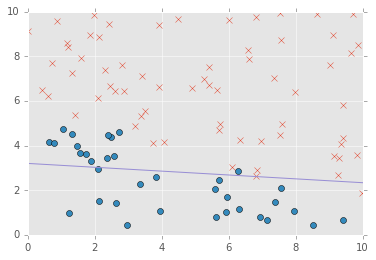

In [369]:
uplist = []
downlist = []
for i in range(N):
    if t[i]==1:
        uplist = uplist +[x[i]]
        
    else:
        downlist = downlist +[x[i]]
uplist = np.array(uplist)
downlist = np.array(downlist)

plt.plot(uplist[:,1], uplist[:,2],'x')
plt.plot(downlist[:,1], downlist[:,2],'o')
X = np.linspace(0.01, 10, 100)
Y = linreg(X)
plt.plot(X,Y)
plt.axis([0,10,0,10])

3.19821239154 0.0864087309518


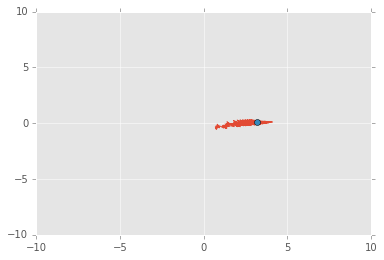

In [370]:
# the graph of y-intrsection vs slope of the linear graph
wlist = np.array(wlist)
plt.plot(-wlist[:,0]/wlist[:,2], wlist[:,1]/wlist[:,2])
plt.plot(-wlist[:,0][-1]/wlist[:,2][-1], wlist[:,1][-1]/wlist[:,2][-1], 'o')
plt.axis([-10,10,-10,10])
print -wlist[:,0][-1]/wlist[:,2][-1], wlist[:,1][-1]/wlist[:,2][-1]

[0, 10, 0, 10]

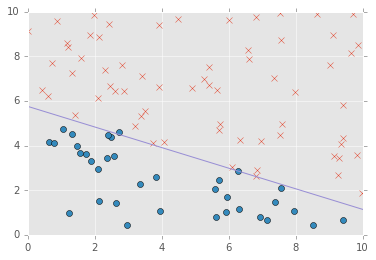

In [371]:
N = 100
w = weight()
I = initial_values(N)

# same t and x 

eta = 0.01
alpha = 0.01
turn = 1
turns = 1000
wlist=[w]
while turn < turns:
    a = np.dot(x, w)
    y = sigmoid(a)
    e = t - y
    g = -np.dot(np.transpose(x), e) # sum , batch 

    w = w - eta * ( g + alpha * w )
    wlist += [w]
    turn += 1
uplist = []
downlist = []
for i in range(N):
    if t[i]==1:
        uplist = uplist +[x[i]]
        
    else:
        downlist = downlist +[x[i]]
uplist = np.array(uplist)
downlist = np.array(downlist)

plt.plot(uplist[:,1], uplist[:,2],'x')
plt.plot(downlist[:,1], downlist[:,2],'o')
X = np.linspace(0.01, 10, 100)
Y = linreg(X)
plt.plot(X,Y)
plt.axis([0,10,0,10])

5.75274082739 0.461318323837


[-10, 10, -10, 10]

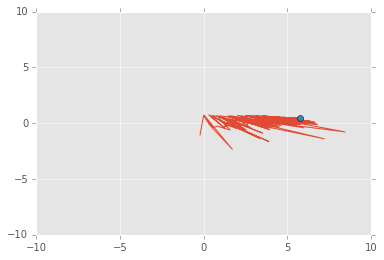

In [372]:
# the graph of y-intrsection vs slope of the linear graph
wlist = np.array(wlist)
plt.plot(-wlist[:,0]/wlist[:,2], wlist[:,1]/wlist[:,2])
plt.plot(-wlist[:,0][-1]/wlist[:,2][-1], wlist[:,1][-1]/wlist[:,2][-1], 'o')
print -wlist[:,0][-1]/wlist[:,2][-1], wlist[:,1][-1]/wlist[:,2][-1]
plt.axis([-10,10,-10,10])